In [ ]:
# 03/2023


from IPython.display import clear_output
import random
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
#funções para criação dos pontos


#criando a lista de pontos aleatórios, apenas gera uma lista de pontos, são as cidades.
pontos = set()
def gerar_pontos_aleatorios(num_pontos, pontos):
  while len(pontos) < num_pontos:
      x = random.randint(0, 40)
      y = random.randint(0, 40)
      pontos.add((x, y))

  return list(pontos)



#criando os pontos em layout circular, há a possibilidade de usar um layout circular.
def gerar_pontos_circulares(n, raio):
    pontos = []
    angulo_incremento = 2 * math.pi / n

    for i in range(n):
        angulo = i * angulo_incremento
        x = raio * math.cos(angulo)
        y = raio * math.sin(angulo)
        pontos.append((x, y))

    return pontos



#plotar distribuição, visualização apenas.
def plotar_distribuicao(pontos):
  x = [ponto[0] for ponto in pontos]
  y = [ponto[1] for ponto in pontos]

  plt.scatter(x, y)
  plt.xlabel('Coordenada X')
  plt.ylabel('Coordenada Y')
  plt.title('Distribuição inicial dos pontos')
  #plt.grid(True)
  plt.show()

In [ ]:
#funções que fazem os calculos das distancias.

#distancia euclidiana entre dois pontos
def calcular_distancia(p1, p2):
    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

#distancia total uma rota
def calcular_distancia_total(rota):
    distancia_total = 0
    for i in range(len(rota) - 1):
        distancia_total += calcular_distancia(rota[i], rota[i + 1])
    distancia_total += calcular_distancia(rota[-1], rota[0])
    return distancia_total



In [ ]:
#rota inicial aleatoria
def criar_rota_inicial(pontos):
    rota = pontos[:]
    random.shuffle(rota)
    return rota

In [ ]:
### funções referentes ao algoritmo genético


#função que cruza os indivíduos
def crossover(rota1, rota2):

    # individuos podem ser chamados de rota.

    #define dois pontos de corte, e descarta os "genes" ou "pontos" que o indivíduo carregava
    ponto_corte = random.randint(1, num_pontos)
    ponto_corte2 = random.randint(1, num_pontos)
    inicio = min(ponto_corte, ponto_corte2)
    fim = max(ponto_corte, ponto_corte2)

    #corta o individuo com base nos pontos de corte, pegando somente a metade entre os pontos de corte.\
    #por exemplo: individuo igual à pontos 6, 2, 4, 5, 1, 7, 3, 8. se os pontos de corte forem nas posições 3 e 7, o individuo manterá apenas os pontos 5, 1, 7, 3
    filho1 = rota1[inicio:fim]

    #define a continuação dos pontos para o primeiro individuo que foi cortado. desta maneira, os pontos que antes faltavam no individuo 1\
    #são completados pelos pontos das posições do indivíduo 2. que não estão presentes no primeiro indivíduo. mudando sua rota.
    continuacao = [ponto for ponto in rota2 if ponto not in filho1]
    filho1.extend(continuacao)

    return filho1


#mutação em uma rota
def mutacao(rotas, taxa_mutacao):
    for i in range(len(rotas)):
        if random.random() < taxa_mutacao: #gera um valor aleatório para definir se haverá mutação ou não em cada indivíduo
            j = random.randint(0, num_pontos - 2)
            k = random.randint(0, num_pontos - 2)
            rotas[i][k], rotas[i][j] = rotas[i][j], rotas[i][k] #caso o valor aleatório se aplique, as rotas são trocadas de ordem com aleatoriedade.
    return rotas



In [ ]:
def algoritmo_genetico(pontos, num_populacao, taxa_mutacao, num_geracoes, elite):


    # inicializar a população. define uma rota totalmente aleatória para cada indivíduo
    populacao = [criar_rota_inicial(pontos) for _ in range(num_populacao)]


    #progresso = tqdm(total=num_geracoes, desc='Gerações')
    distancias_geral = []

    # loop para passar as gerações
    for geracao in range(num_geracoes):
        #avaliar aptidão de cada indivíduo. gera uma lista com todas as distancias totais que cada rota de indivíduo tem.
        aptidoes = [calcular_distancia_total(rota) for rota in populacao] #aptidão é a distancia total que cada indivíduo percorreu, quanto menor, mais apto ele é.


        #ordena a população com base nas aptidões (menor valor primeiro)
        populacao = [rota for _, rota in sorted(zip(aptidoes, populacao))]

        # melhor solução
        melhor_rota = populacao[0]
        menor_distancia = aptidoes[0]
        distancias_geral.append(menor_distancia)


        filhos = [] # inicializa a lista de filhos da próxima geração. lista vazia por enquanto.


        #elite
        for i in range(elite):
            filhos.append(populacao[i]) # coloca a elite (melhores individuos) direto na próxima geração, sem alterações.

        populacao_elitizada = num_populacao - elite # calcula quantos lugares disponíveis ainda restam na população após a chegada da elite


        #loop que gera os filhos para a próxima geração.
        for i in range(populacao_elitizada): #percorre pelos melhores indivíduos até o valor restante da elite. por exemplo, se a elite for\
        #300 e a população geral for 1000, este loop vai até os 700 melhores indivíduos da geração atual.

            pai = populacao[i] # pega o pai, o primeiro indivíduo de cada população é o unico que não será mãe.
            mae = populacao[i+1] # pega a mãe, o último indivíduo da contagem do loop é o unico que não será pai.

            filho1 = crossover(pai, mae) # cruza os indivíduos, com base na função crossover já definida acima.
            filhos.append(filho1)


        # mutação, aplicação da função já definida em células acima.
        filhos_mutados = mutacao(filhos, taxa_mutacao)


        populacao = filhos_mutados # apenas define a nova população após a aplicação da mutação aleatória.

        #progresso.update(1)

        if  geracao % 5 == 0:

          clear_output(wait=True)


          x = [ponto[0] for ponto in melhor_rota]
          y = [ponto[1] for ponto in melhor_rota]


          plt.plot(x, y, marker='o')
          #plt.scatter(x[1:-1], y[1:-1], color='blue')
          plt.xlabel('Coordenada x')
          plt.ylabel('Coordenada y')
          plt.title(f'melhor rota da geração {geracao}')
          #plt.legend()
          plt.grid(False)
          plt.show()


    clear_output(wait=True)
    #progresso.close()

    return melhor_rota, menor_distancia, distancias_geral

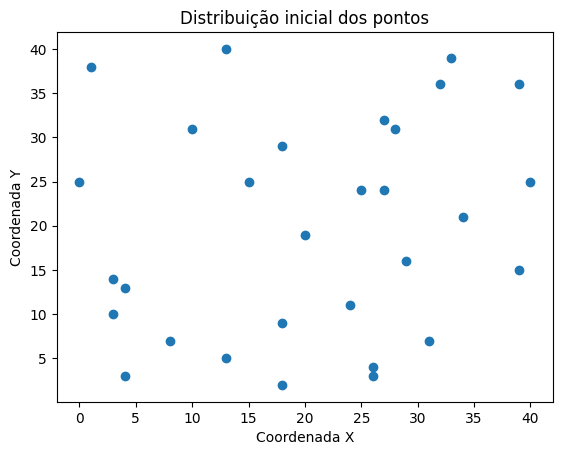

In [ ]:
#primeiramente, especifique os pontos (ou cidades), mudar a variável "num_pontos" é bem interessante



pontos = set()
#QUANTIDADE de pontos aleatorios (cidades).
num_pontos = 30

#caso deseje utilizar um layout circular para os pontos, defina aqui o raio do circulo.
raio_circulo = 60

#gerar pontos circulares
#pontos = gerar_pontos_circulares(num_pontos, raio_circulo)


#gerar pontos aleatórios
pontos = gerar_pontos_aleatorios(num_pontos, pontos)

#plot da distribuição inicial, sem rotas:
plotar_distribuicao(pontos)



pontos.append(pontos[0])
num_pontos = len(pontos)


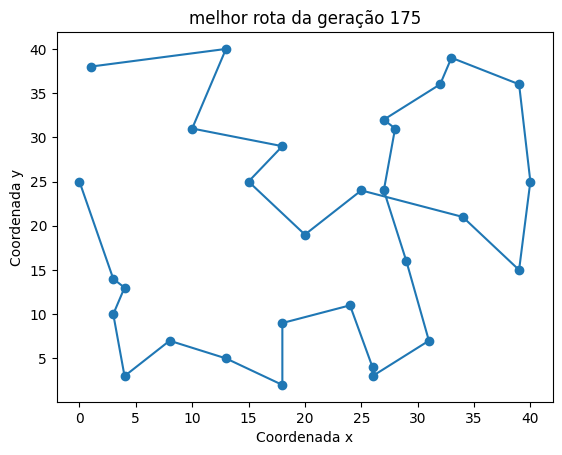

In [ ]:
"""MAIN"""
num_populacao = 1000 # quantidade de indivíduos, apenas numeros inteiros
taxa_mutacao = 0.05 # coeficiente de mutação. de 0 a 1
num_geracoes = 180 # numero de gerações, apenas numeros inteiros


elite = 250 # elite que será passada para a próxima geração sem mutação nem CrossOver



melhor_rota, menor_distancia, distancias_geral = algoritmo_genetico(pontos, num_populacao, taxa_mutacao, num_geracoes, elite)


Menor distância percorrida: 211.36532748202225


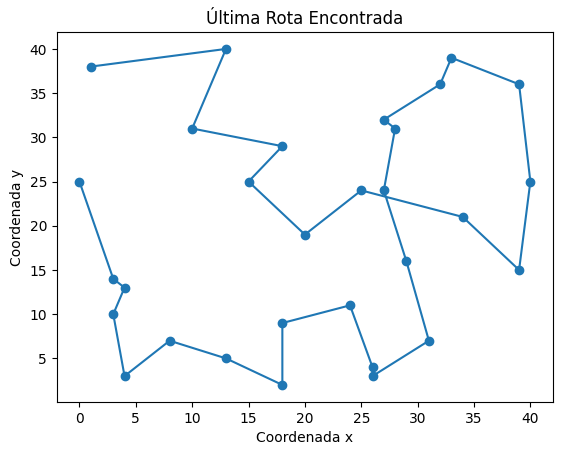

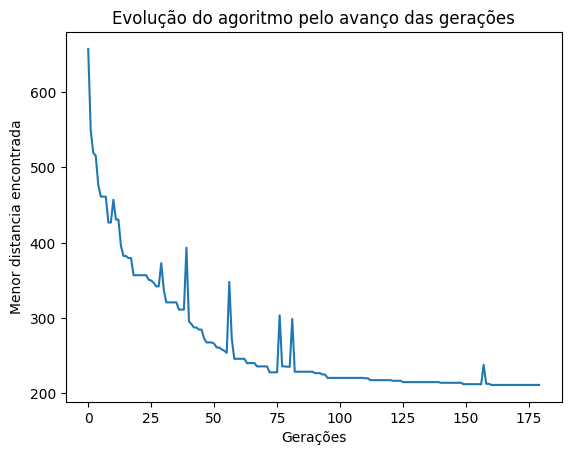

Distância percorrida pelo primeiro individuo que foi testado:  657.3876004416993
Menor distância encontrada em todas as gerações:  211.36532748202225


In [ ]:
"""eval"""

print("Menor distância percorrida:", menor_distancia)


x = [ponto[0] for ponto in melhor_rota]
y = [ponto[1] for ponto in melhor_rota]


plt.plot(x, y, marker='o')
#plt.scatter(x[1:-1], y[1:-1], color='blue')
plt.xlabel('Coordenada x')
plt.ylabel('Coordenada y')
plt.title('Última Rota Encontrada')
#plt.legend()
plt.grid(False)
plt.show()

print()

indices = range(len(distancias_geral))

plt.plot(indices, distancias_geral)
plt.xlabel('Gerações')
plt.ylabel('Menor distancia encontrada')
plt.title('Evolução do agoritmo pelo avanço das gerações')
plt.show()

print('Distância percorrida pelo primeiro individuo que foi testado: ',distancias_geral[0])


print('Menor distância encontrada em todas as gerações: ', min(distancias_geral))